In [1]:
# 🧠 Task 03 — Train Decision Tree, Evaluate, and Export Results
# Dataset: Bank Marketing Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure folders exist
os.makedirs("outputs/figures", exist_ok=True)

# Load dataset (using the smaller one for simplicity)
file_path = "data/bank.csv"
data = pd.read_csv(file_path, sep=';')

print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)
data.head()


✅ Dataset loaded successfully!
Shape: (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
data.info()
print("\nMissing values per column:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Missing values per column:
 age          0
job          0
marital      0
education    0
default   

In [3]:
# Convert categorical columns to numeric using get_dummies
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [4]:
X = data_encoded.drop('y_yes', axis=1)   # 'y' column is binary ('yes'/'no')
y = data_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3616, 42)
Testing set size: (905, 42)


In [5]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [6]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.906

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.97      0.95       807
        True       0.61      0.36      0.45        98

    accuracy                           0.91       905
   macro avg       0.77      0.66      0.70       905
weighted avg       0.89      0.91      0.89       905



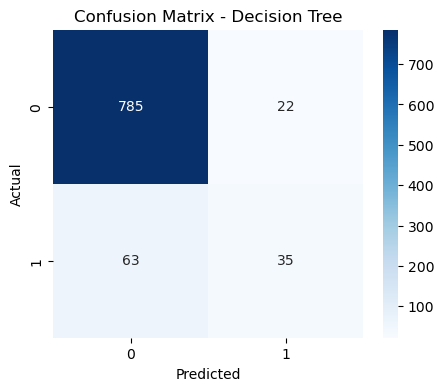

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("outputs/figures/task03_confusion_matrix.png")
plt.show()


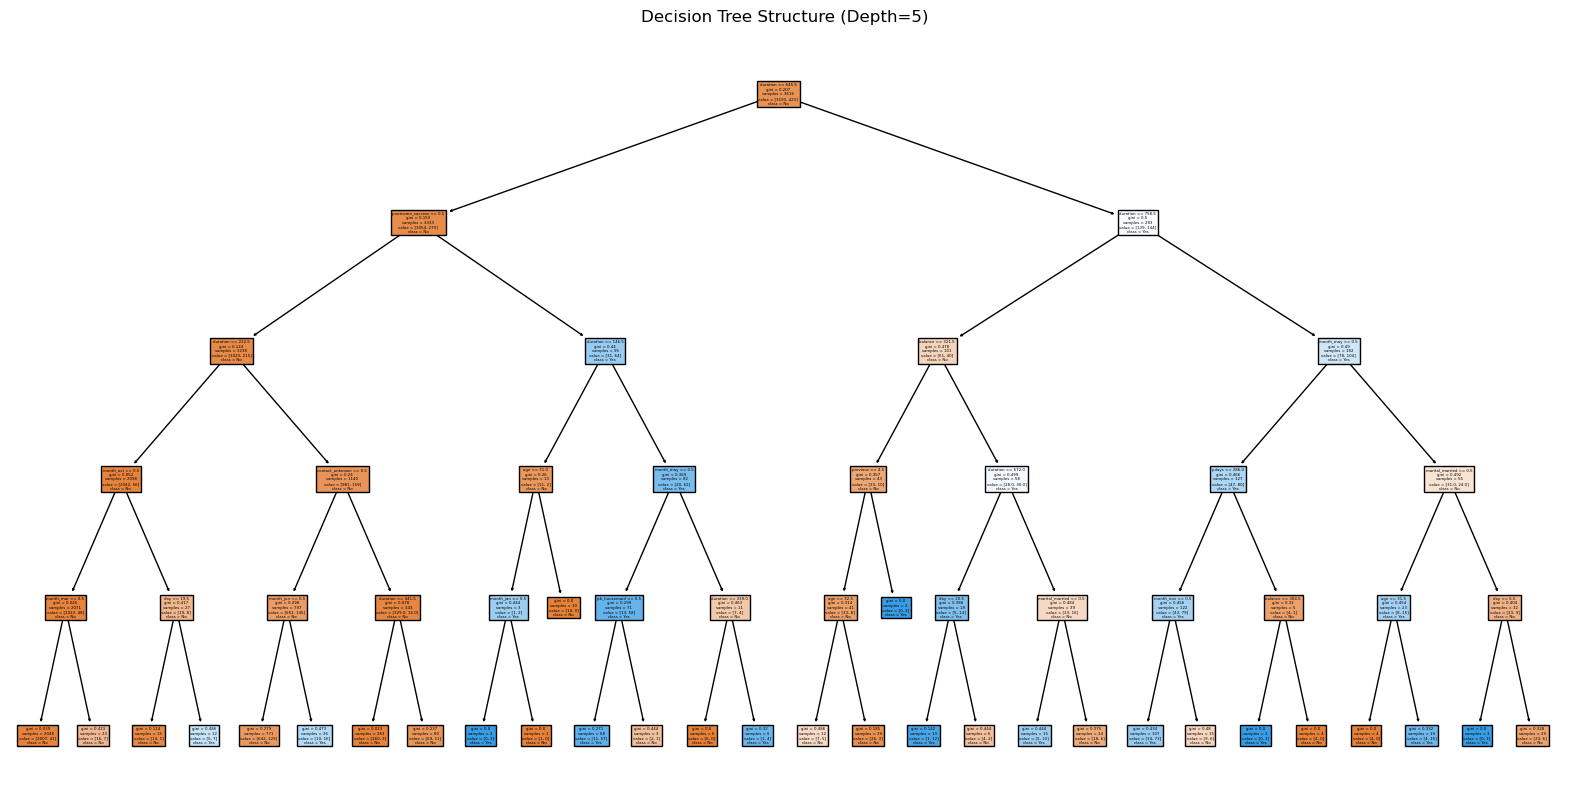

In [8]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree Structure (Depth=5)")
plt.show()


In [9]:
import joblib
joblib.dump(dt, "outputs/decision_tree_model.pkl")
print("✅ Model saved as decision_tree_model.pkl")


✅ Model saved as decision_tree_model.pkl
